In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [13]:
# Data Preprocessing Steps 
df = pd.read_excel('self_learning_data.xlsx')
df.head()

# Make a deep copy of the dataframe
df_transformed = df.copy(deep = True) 

# Check for missing values in the dataframe (None found)
df_transformed.isnull().sum() 

# Add target value (label)
df_transformed['DroppedOut'] = df_transformed.apply(lambda row: 1 if pd.notnull(row['TerminationType'])
                            
                            or row['Status'] == 'Closed' else 0, axis=1)

# Specify the columns you want to drop
columns_to_drop = ['TumoID','TerminationType', 'TerminationReason', 'PathDate', 'StudentSchedule', 'Status', 'AttendingSince']

# Drop the columns
df_transformed = df_transformed.drop(columns=columns_to_drop)

# Check for missing values in the dataframe (Some found)
df_transformed.isnull().sum() 

# Drop the rows with null values
df_transformed = df_transformed.dropna()

# Check for missing values in the dataframe (None found)
df_transformed.isnull().sum() 

df_transformed.to_excel('labeled.xlsx', index=False)

# # Replace categorical values in 'Sex' columns to 0s and 1s
# df_transformed['Sex'] = df_transformed['Sex'].replace({'F': 0, 'M': 1})

# # Replace categorical values in 'Hypertensive' column to 1s and 2s
# df_transformed['Hypertensive'] = df_transformed['Hypertensive'].replace({'Normal': 1, 'High': 2})

# df_transformed.head()

# # Save the transformed dataset
# df_transformed.to_csv('transformed_ExamTable.csv', index=False)

In [19]:
# Load the transformed dataset
df_transformed = pd.read_excel('labeled.xlsx')

# Separate the features (X) and target variable (y)
X = df_transformed.drop('DroppedOut', axis=1)
y = df_transformed['DroppedOut']

# 1. Perform z-score normalization on the features 
# scaler = StandardScaler()
# X_normalized = scaler.fit_transform(X)

# 2. Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)
predictions = []  # List to store the predictions of each fold

# 3. Train a linear SVM classifier on each fold
svm = SVC(kernel='linear')

for train_index, test_index in skf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the SVM classifier
    svm.fit(X_train, y_train)
    
    # Save accuracies of each fold in a list
    accuracy = svm.score(X_test, y_test)
    predictions.append(accuracy)  # Store the prediction of the fold

In [20]:
# Calculate the average prediction
average_prediction = sum(predictions) / len(predictions)
print(f"Average Prediction: {average_prediction}")

# Calculate the standard deviation of the predictions
std_deviation = np.std(predictions)

# Calculate the plus/minus standard deviation
plus_minus_std_deviation = std_deviation / np.sqrt(len(predictions))

print(f"Average Prediction: {average_prediction} +/- {plus_minus_std_deviation}")

Average Prediction: 0.8664620039780503
Average Prediction: 0.8664620039780503 +/- 0.02758659060299678


In [21]:
# Get the coefficients of the SVM model
coefficients = svm.coef_[0]

# Get the absolute values of the coefficients
abs_coefficients = np.abs(coefficients)

# Sort the features based on their importance
sorted_indices = np.argsort(abs_coefficients)[::-1]

# Get the names of the features
feature_names = X.columns

# Get the names of the five significant features
significant_features = feature_names[sorted_indices[:5]]

print("Five significant features:")
print(significant_features)

Five significant features:
Index(['RetentionByMonths', 'ContinuousAbsenceSinceLastLogin',
       'RegularPresent', 'Awarded', 'NumOfAttemptedActivities'],
      dtype='object')


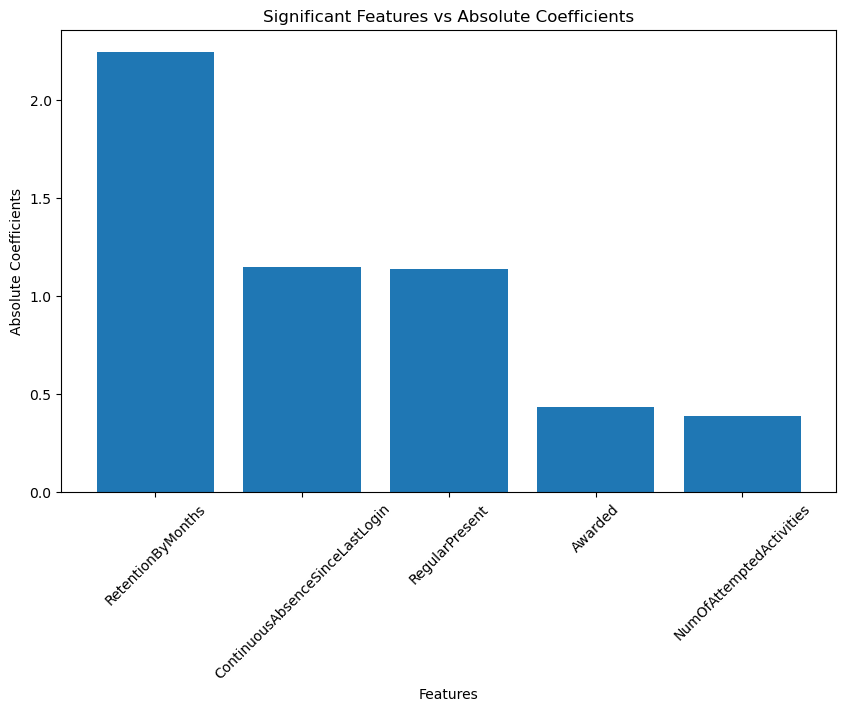

In [22]:
# Bar Chart plot of the 5 significant features
plt.figure(figsize=(10, 6))
plt.bar(significant_features, abs_coefficients[sorted_indices[:5]])
plt.xlabel('Features')
plt.ylabel('Absolute Coefficients')
plt.title('Significant Features vs Absolute Coefficients')
plt.xticks(rotation=45)
plt.show()